In [135]:
import pandas as pd

df = pd.read_csv(
    "SMSSpamCollection",
    sep="\t",
    names=["label", "message"]
)

print(df.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [136]:
df.to_csv("sms_data.csv", index=False)


In [137]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [138]:
df.shape

(5572, 2)

In [139]:
df.columns

Index(['label', 'message'], dtype='object')

In [140]:
# Missing Values
df.isnull().sum()

label      0
message    0
dtype: int64

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [142]:
# Duplicate Values
df.duplicated().sum()

np.int64(403)

In [143]:
# Remove duplicate values
df = df.drop_duplicates(keep = 'first')

In [144]:
# Duplicate Values
df.duplicated().sum()

np.int64(0)

In [145]:
df.shape

(5169, 2)

In [146]:
df['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

In [147]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [148]:
df['label'] = encoder.fit_transform(df['label'])

In [149]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


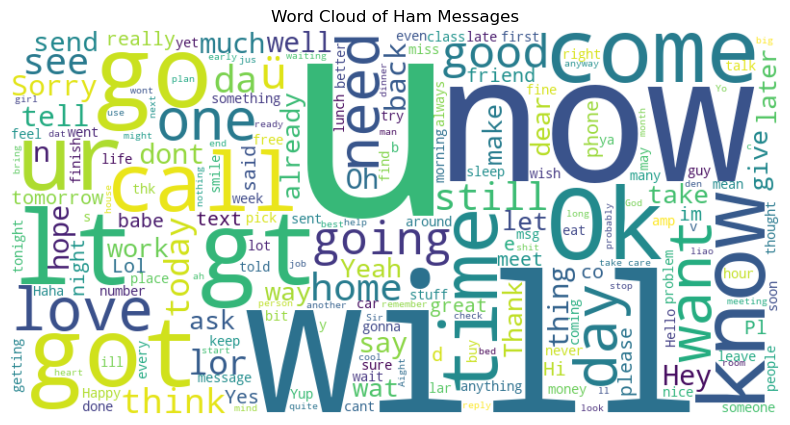

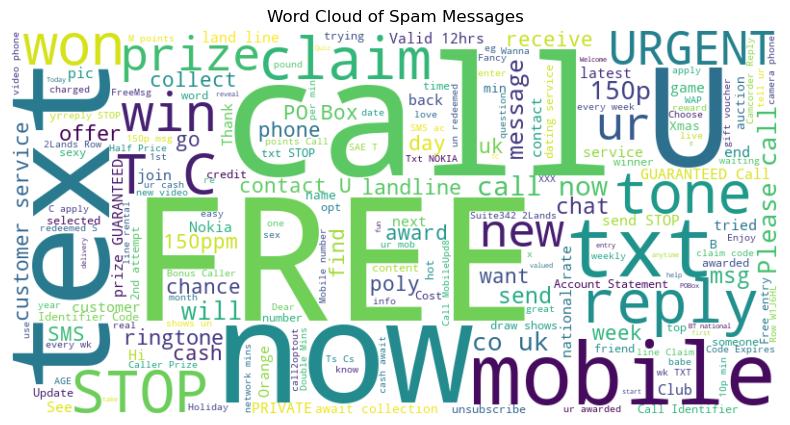

In [150]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

for label, category in zip([0, 1], ['Ham', 'Spam']):
    text = " ".join(df[df['label'] == label]['message'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud of {category} Messages")
    plt.show()

In [151]:
import nltk
nltk.download('punkt_tab')  
nltk.download('punkt')      

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sowmy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sowmy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [152]:
# Lower Case

def lower_text(text):
    if pd.isna(text):
        return ""
    return text.lower()


In [153]:
# Tokenization 

def tokennize_text(text):
    if text == "":
        return []
    return nltk.word_tokenize(text)


In [154]:
# Removing Special Characters
def remove_spec_char(text):
    y = []
    for txt in text:
        if txt.isalnum():
            y.append(txt)
    return y

In [155]:
# Removing Stopwords and Punctuation 
from nltk.corpus import stopwords
import string

stop_words = set(stopwords.words("english"))
punctuations = set(string.punctuation)

def remove_stop_pun(text):
    y = []
    for txt in text:
        if txt not in stop_words and txt not in punctuations:
            y.append(txt)
    return y


In [156]:
# Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def stemming(text):
    if not text:
        return ""
    return " ".join(ps.stem(txt) for txt in text)


In [157]:
# Building the preprocessing Pipeline
pipeline = [
    lower_text,
    tokennize_text,
    remove_spec_char,
    remove_stop_pun,
    stemming
]

# Function to run all steps
def preprocess_text(text):
    for func in pipeline:
        text = func(text)
    return text


In [158]:
# Applying the pipeline
df["transformed_text"] = df["message"].apply(preprocess_text)

df = df[df["transformed_text"].str.strip() != ""]
df = df.dropna(subset=["transformed_text"])


In [159]:
df.head()

,label,message,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


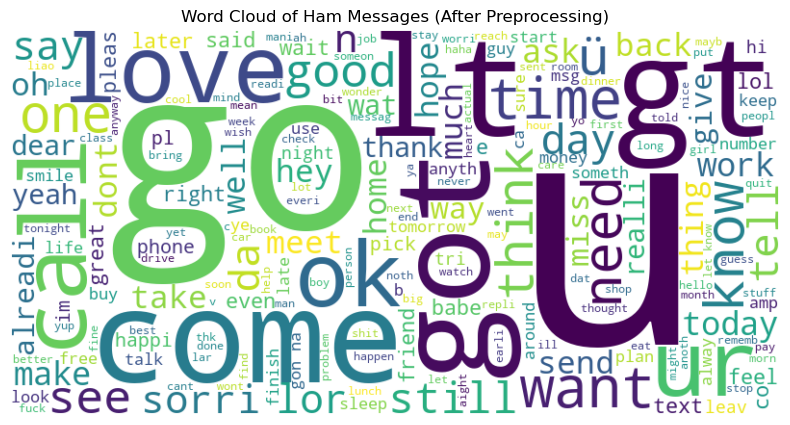

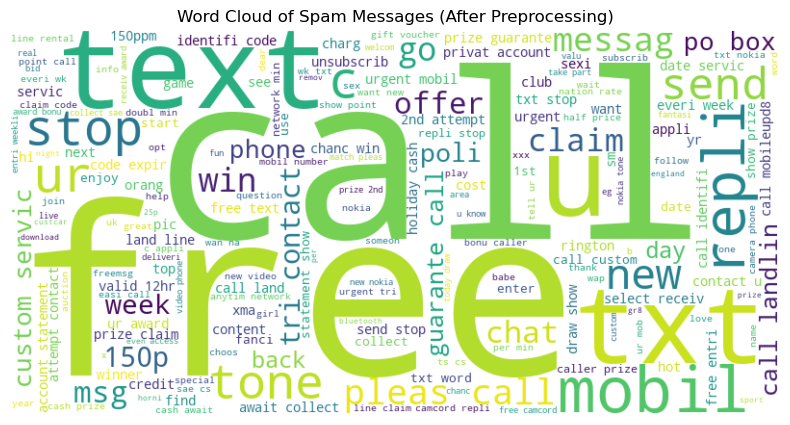

In [160]:
from wordcloud import STOPWORDS

for label, category in zip([0, 1], ['Ham', 'Spam']):
    text = " ".join(df[df['label'] == label]['transformed_text'])
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=STOPWORDS,
        max_words=200,
        colormap='viridis'
    ).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud of {category} Messages (After Preprocessing)")
    plt.show()


In [161]:
def add_text_features(df):
    df["num_characters"] = df["message"].fillna("").apply(len)
    df["num_words"] = df["message"].fillna("").apply(lambda x: len(x.split()))
    df["num_sentences"] = df["message"].fillna("").apply(
        lambda x: x.count('.') + x.count('!') + x.count('?')
    )
    return df


In [162]:
df = add_text_features(df)

In [163]:
df.head()

,label,message,transformed_text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,111,20,8
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,29,6,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,155,28,1
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,49,11,6
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,61,13,0


In [164]:
assert df["transformed_text"].isna().sum() == 0
assert (df["transformed_text"].str.strip() == "").sum() == 0

In [165]:
from sklearn.model_selection import train_test_split

def split_data(df):
    train_df, temp_df = train_test_split(
        df,
        test_size=0.30,
        random_state=42,
        stratify=df["label"]
    )

    val_df, test_df = train_test_split(
        temp_df,
        test_size=0.50,
        random_state=42,
        stratify=temp_df["label"]
    )

    return train_df, val_df, test_df


In [166]:
def save_splits(train_df, val_df, test_df):
    train_df.to_csv("train.csv", index=False)
    val_df.to_csv("validation.csv", index=False)
    test_df.to_csv("test.csv", index=False)


In [167]:
train_df, val_df, test_df = split_data(df)
save_splits(train_df, val_df, test_df)

In [168]:
train_df.head()

,label,message,transformed_text,num_characters,num_words,num_sentences
2638,0,No I don't have cancer. Moms making a big deal...,cancer mom make big deal regular checkup aka p...,85,18,1
3027,0,I finished my lunch already. U wake up already?,finish lunch alreadi u wake alreadi,47,9,2
293,0,Oops. 4 got that bit.,oop 4 got bit,21,5,2
231,0,Get down in gandhipuram and walk to cross cut ...,get gandhipuram walk cross cut road right side...,109,20,2
3395,0,Bull. Your plan was to go floating off to IKEA...,bull plan go float ikea without care world liv...,129,28,3


In [169]:
train_df.shape

(3612, 6)

In [170]:
test_df.head()

,label,message,transformed_text,num_characters,num_words,num_sentences
5229,0,It means u could not keep ur words.,mean u could keep ur word,35,8,1
1285,0,But if she.s drinkin i'm ok.,drinkin ok,28,6,2
2081,0,Where is it. Is there any opening for mca.,open mca,42,9,2
3222,1,"Thanks for your ringtone order, reference numb...",thank rington order refer number x29 mobil cha...,157,24,3
4025,0,Wat time ü wan today?,wat time ü wan today,21,5,1


In [171]:
test_df.shape

(775, 6)

In [172]:
val_df.head

<bound method NDFrame.head of       label                                            message  \
5034      0  * Was really good to see you the other day dud...   
196       0                       Gud mrng dear hav a nice day   
635       1  Dear Voucher Holder, 2 claim this weeks offer,...   
3214      0                                     What's ur pin?   
3612      0                   No. I.ll meet you in the library   
...     ...                                                ...   
5325      0  Gal n boy walking in d park. gal-can i hold ur...   
1257      0     Not yet chikku..going to room nw, i'm in bus..   
2958      0  I would but I'm still cozy. And exhausted from...   
4674      0  I forgot 2 ask ü all smth.. There's a card on ...   
3197      0  I av a new number,  . Wil u only use this one,ta.   

                                       transformed_text  num_characters  \
5034                    realli good see day dudett miss              69   
196                        

In [173]:
val_df.shape

(774, 6)